In [109]:
from numpy import array
from scipy.interpolate import RegularGridInterpolator as rgi
import numpy as np

In [35]:
x = np.linspace(1,4,11);
y = np.linspace(4,7,22);
z = np.linspace(7,9,33);

v = np.zeros((11, 22, 33))

In [36]:
for i in np.arange(1, 11):
    for j in np.arange(1, 22):
        for k in np.arange(1, 33):
            v[i, j, k] = 100 * 1 + 10 * j * 1 * k
    

In [37]:
my_interpolating_function = rgi((x, y, z), v)


In [4]:
from netCDF4 import Dataset

In [110]:
hafs_set = Dataset("test_v2_out.nc")

In [116]:
hafs_set["gh"][0, :,106,774]

masked_array(data=[42616.758   , 35838.914   , 33520.75    , 31112.764   ,
                   26517.188   , 23897.074   , 20699.744   , 18686.424   ,
                   16598.453   , 15327.316   , 14255.613   , 13309.327   ,
                   12458.501   , 11684.763   , 10975.713   , 10319.615   ,
                    9707.933   ,  9136.091   ,  8595.802   ,  8085.145   ,
                    7600.372   ,  7139.8     ,  6701.122   ,  6281.4536  ,
                    5880.2964  ,  5496.6777  ,  5128.1416  ,  4772.7754  ,
                    4429.313   ,  4097.315   ,  3776.008   ,  3464.6968  ,
                    3162.9797  ,  2869.8616  ,  2585.0188  ,  2308.1365  ,
                    2038.5945  ,  1776.094   ,  1520.1387  ,  1270.5612  ,
                    1027.0543  ,   789.07355 ,   556.0965  ,   327.62286 ,
                     101.876236],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [121]:
hafs_set["isobaricInhPa"][:]

masked_array(data=[   2,    5,    7,   10,   20,   30,   50,   70,  100,
                    125,  150,  175,  200,  225,  250,  275,  300,  325,
                    350,  375,  400,  425,  450,  475,  500,  525,  550,
                    575,  600,  625,  650,  675,  700,  725,  750,  775,
                    800,  825,  850,  875,  900,  925,  950,  975, 1000],
             mask=False,
       fill_value=999999)

In [43]:
lats = hafs_set["lat"][:].data
lons = hafs_set["lon"][:].data
levs = hafs_set["level"][:].data

In [81]:
np.shape(lons)

(1001,)

In [84]:
np.shape(u)

(1, 45, 801, 1001)

In [89]:
reshape

NameError: name 'reshape' is not defined

In [ ]:
###Lev, lat, lon 

In [91]:
latgrid = np.reshape(np.repeat(lats, len(lons)), (len(lats), len(lons)))
longrid = np.reshape(np.repeat(lons, len(lats)), (len(lats), len(lons)))

In [97]:
from scipy.interpolate import NearestNDInterpolator

In [101]:
lat = 20 
lon = 287 

In [102]:
###Grab the nearest latitude longitude point 


abslat = np.abs(lats - lat)
abslon = np.abs(lons - lon)

In [107]:
abslat[259]

0.006740999999728103

In [108]:
lats[259]

20.006740999999728

In [106]:
np.argmin(abslat)

259

In [103]:
from matplotlib import pyplot as plt

TypeError: Input z must be 2D, not 1D

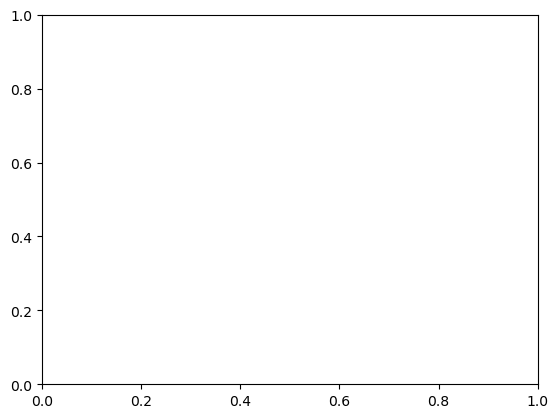

In [104]:
plt.contourf(abslat)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): time(1), lat(801), lon(1001), isobaricInhPa(45)
    variables(dimensions): float64 time(time), float64 lat(lat), float64 lon(lon), int64 isobaricInhPa(isobaricInhPa), float32 u(time, isobaricInhPa, lat, lon), float32 u_FOLDED(time, isobaricInhPa, lat, lon), float32 v(time, isobaricInhPa, lat, lon), float32 v_FOLDED(time, isobaricInhPa, lat, lon), float32 w(time, isobaricInhPa, lat, lon), float32 w_FOLDED(time, isobaricInhPa, lat, lon), float32 refc(time, lat, lon), float32 gh(time, isobaricInhPa, lat, lon)
    groups: 

In [77]:
###Grab the vector wind for every point on the grid. 

array([-2.84])

In [127]:
radar_dat = Dataset("/Users/ischluesche/Documents/Grad_School/Research/julia_grib/g_alias.jl/cfrads/cfrad.20220918_100011.765_to_20220918_100015.745_N42RF-TS_AIR.nc")

In [134]:
levs

array([   2,    5,    7,   10,   20,   30,   50,   70,  100,  125,  150,
        175,  200,  225,  250,  275,  300,  325,  350,  375,  400,  425,
        450,  475,  500,  525,  550,  575,  600,  625,  650,  675,  700,
        725,  750,  775,  800,  825,  850,  875,  900,  925,  950,  975,
       1000])

In [135]:
heights = hafs_set["gh"][0,:,:,:]

In [136]:
np.shape(heights)

(45, 801, 1001)

In [ ]:
# nputds, "CLOSEST_HAFS_LAT", gate_model_lat_idxs, ("n_points",))
# defVar(inputds, "CLOSEST_HAFS_LON", gate_model_lon_idxs, ("n_points",))
# defVar(inputds, "NEW_Z_METERS", zdist, ("n_points", ))

In [168]:
min(hz)

-48883.13734375

In [ ]:
hafs_lats = hafs_set["lat"][:]
hafs_lons = hafs_set["lon"][:]

In [214]:
u = hafs_set["u"][0,:,:,:]
v = hafs_set["v"][0,:,:,:]
w = hafs_set["w"][0,:,:,:]


u_interp_grid = rgi((levs, hafs_lats, hafs_lons), u)
v_interp_grid = rgi((levs, hafs_lats, hafs_lons), v)
w_interp_grid = rgi((levs, hafs_lats, hafs_lons), w)

In [216]:
hl = radar_dat["CLOSEST_HAFS_LAT"][:]
hln = radar_dat["CLOSEST_HAFS_LON"][:]
hz = radar_dat["NEW_Z_METERS"][:]

In [221]:
isobaric_pressures = []
curr_interp = ""
lat =""
lon=""
z=""

vector_winds = []
u_winds = [] 
v_winds = [] 
w_winds = [] 
for (latidx, lonidx, z) in zip(hl, hln, hz):
        try: 
                curr_interp = rgi((heights[:, latidx, lonidx].data,),levs )

                curr_isobaric = curr_interp([z])[0]
                curr_lat = hafs_lats[latidx]
                curr_lon = hafs_lons[lonidx]              
                curr_u = u_interp_grid([curr_isobaric, curr_lat, curr_lon])[0]
                curr_v = v_interp_grid([curr_isobaric, curr_lat, curr_lon])[0]
                curr_w = v_interp_grid([curr_isobaric, curr_lat, curr_lon])[0]
                vector_winds.append((curr_u, curr_v, curr_w))
                u_winds.append(curr_u)
                v_winds.append(curr_v) 
                w_winds.append(curr_w)
        except: 
                vector_winds.append(-1)


764.1196083272346 12.083895000000034 300.7930039999859
762.057299074274 12.083895000000034 300.7930039999859
759.9949898213135 12.083895000000034 300.7930039999859
757.9326802239201 12.083895000000034 300.7930039999859
755.8703713153926 12.083895000000034 300.7930039999859
753.8080617179992 12.083895000000034 300.7930039999859
751.7457521206055 12.083895000000034 300.7930039999859
749.6922906367101 12.083895000000034 300.7930039999859
747.6876160308077 12.083895000000034 300.7930039999859
745.6829414249055 12.083895000000034 300.7930039999859
743.678266819003 12.083895000000034 300.7930039999859
741.6735935523297 12.083895000000034 300.7930039999859
739.6689176071983 12.083895000000034 300.7930039999859
737.6642443405249 12.083895000000034 300.7930039999859
735.6595710738518 12.083895000000034 300.7930039999859
733.6548951287202 12.083895000000034 300.7930039999859
731.650221862047 12.083895000000034 300.7930039999859
729.6455459169156 12.083895000000034 300.7930039999859
727.640872650

In [224]:
vector_winds

[(-4.861959956222972, 1.7424917925403283, 1.7424917925403283),
 (-4.904031083864371, 1.7202188541817716, 1.7202188541817716),
 (-4.946102211505771, 1.6979459158232153, 1.6979459158232153),
 (-4.988173346173605, 1.6756729737447835, 1.6756729737447835),
 (-5.030244466788568, 1.6534000391061037, 1.6534000391061037),
 (-5.072315601456402, 1.6311270970276717, 1.6311270970276717),
 (-5.114386736124241, 1.6088541549492377, 1.6088541549492377),
 (-5.159354456959516, 1.5893846137716579, 1.5893846137716579),
 (-5.220296545096161, 1.585375258824433, 1.585375258824433),
 (-5.281238633232799, 1.5813659038772085, 1.5813659038772085),
 (-5.342180721369443, 1.5773565489299834, 1.5773565489299834),
 (-5.403122768793535, 1.5733471966612207, 1.5733471966612207),
 (-5.464064897642729, 1.569337839035534, 1.569337839035534),
 (-5.525006945066824, 1.565328486766771, 1.565328486766771),
 (-5.585948992490911, 1.5613191344980084, 1.5613191344980084),
 (-5.646891121340107, 1.5573097768723214, 1.5573097768723214)

In [220]:
vector_winds

[(-4.861959956222972, 1.7424917925403283, 1.7424917925403283)]

In [200]:
u_interp_grid([7644, 12.08, 300.4])

ValueError: One of the requested xi is out of bounds in dimension 0

In [192]:
vector_winds

[-1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,


In [178]:
vector_winds

[-1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,


In [165]:
curr_interp([20])

ValueError: One of the requested xi is out of bounds in dimension 0

In [155]:
heights[:, lat, lon].data

array([42616.758   , 35838.914   , 33520.75    , 31112.764   ,
       26517.188   , 23897.074   , 20699.744   , 18686.424   ,
       16598.453   , 15327.316   , 14255.613   , 13309.327   ,
       12458.501   , 11684.763   , 10975.713   , 10319.615   ,
        9707.933   ,  9136.091   ,  8595.802   ,  8085.145   ,
        7600.372   ,  7139.8     ,  6701.122   ,  6281.4536  ,
        5880.2964  ,  5496.6777  ,  5128.1416  ,  4772.7754  ,
        4429.313   ,  4097.315   ,  3776.008   ,  3464.6968  ,
        3162.9797  ,  2869.8616  ,  2585.0188  ,  2308.1365  ,
        2038.5945  ,  1776.094   ,  1520.1387  ,  1270.5612  ,
        1027.0543  ,   789.07355 ,   556.0965  ,   327.62286 ,
         101.876236], dtype=float32)

In [157]:
levs

array([   2,    5,    7,   10,   20,   30,   50,   70,  100,  125,  150,
        175,  200,  225,  250,  275,  300,  325,  350,  375,  400,  425,
        450,  475,  500,  525,  550,  575,  600,  625,  650,  675,  700,
        725,  750,  775,  800,  825,  850,  875,  900,  925,  950,  975,
       1000])

In [141]:
heights[:, 106, 774].data

array([42616.758   , 35838.914   , 33520.75    , 31112.764   ,
       26517.188   , 23897.074   , 20699.744   , 18686.424   ,
       16598.453   , 15327.316   , 14255.613   , 13309.327   ,
       12458.501   , 11684.763   , 10975.713   , 10319.615   ,
        9707.933   ,  9136.091   ,  8595.802   ,  8085.145   ,
        7600.372   ,  7139.8     ,  6701.122   ,  6281.4536  ,
        5880.2964  ,  5496.6777  ,  5128.1416  ,  4772.7754  ,
        4429.313   ,  4097.315   ,  3776.008   ,  3464.6968  ,
        3162.9797  ,  2869.8616  ,  2585.0188  ,  2308.1365  ,
        2038.5945  ,  1776.094   ,  1520.1387  ,  1270.5612  ,
        1027.0543  ,   789.07355 ,   556.0965  ,   327.62286 ,
         101.876236], dtype=float32)